# M8 T01 Algoritmes d’aprenentatge NO supervisat: Agrupació

#### Bibliotecas

In [5]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install kneed

In [120]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [228]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import style
import matplotlib.ticker as ticker

import sys
import seaborn as sns
import pandas as pd

import math
import statistics

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from pca import pca

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

from yellowbrick.cluster import KElbowVisualizer

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc

from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

#### Descripció Dataset

Per descarregar el dataset: ['Facebook Live Sellers in Thailand Data Set'](https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand)

Abstract: Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

Data Set Characteristics:  Multivariate

Number of Instances: 7051

Attribute Characteristics: Integer

Number of Attributes: 12

Associated Tasks: Clustering

Number of Web Hits: 71230


Data Set Information: 

The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.

Attribute Information:

* status_id
* status_type
* status_published
* num_reactions
* num_comments
* num_shares
* num_likes
* num_loves
* num_wows
* num_hahas
* num_sads
* num_angrys



In [229]:
#importem el dataset 

df = pd.read_csv('./dataset/Facebook_Thailandia.csv', delimiter=",", decimal=".", encoding ='utf8')
df.sample(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
2993,134115277150304_238778650017299,video,3/19/2018 23:46,295,1066,254,212,79,0,3,0,1,NaN,NaN,NaN,NaN
4193,848451358648417_891619797664906,video,1/14/2018 2:53,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
5030,614855718638584_837100506414103,photo,5/27/2018 1:14,18,0,1,18,0,0,0,0,0,NaN,NaN,NaN,NaN
4890,614855718638584_845487582242062,photo,6/4/2018 7:56,22,1,0,22,0,0,0,0,0,NaN,NaN,NaN,NaN
6237,819700534875473_984750728370452,status,5/11/2018 3:23,295,18,0,288,4,0,0,3,0,NaN,NaN,NaN,NaN


In [230]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

### Exploració de les dades

In [3]:
df.shape

(7050, 16)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum().sort_values()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [231]:
import datetime as dt
from datetime import date, time, datetime

In [232]:
#Convertim la variable 'status_publisheda' a tipus datatime per manipular les dades

df['status_published'] = pd.to_datetime(df['status_published'])

#Afegim les columnes noves necessaries al dataset 
#day_week[0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday, 4=Friday, 5=Saturday, 6=Sunday]

df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day_week'] = df['status_published'].dt.dayofweek 
df['hour'] = df['status_published'].dt.hour

df.drop(['status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'year', 'month', 'day_week', 'hour'],
      dtype='object')

In [51]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,2016,9,5,2
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,2016,9,4,11
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,2016,9,2,23
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,2016,9,1,0


In [233]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   object
 1   status_type    7050 non-null   object
 2   num_reactions  7050 non-null   int32 
 3   num_comments   7050 non-null   int32 
 4   num_shares     7050 non-null   int32 
 5   num_likes      7050 non-null   int32 
 6   num_loves      7050 non-null   int32 
 7   num_wows       7050 non-null   int32 
 8   num_hahas      7050 non-null   int32 
 9   num_sads       7050 non-null   int32 
 10  num_angrys     7050 non-null   int32 
 11  year           7050 non-null   int32 
 12  month          7050 non-null   int32 
 13  day_week       7050 non-null   int32 
 14  hour           7050 non-null   int32 
dtypes: int32(13), object(2)
memory usage: 468.3+ KB


In [234]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [235]:
fb_Thai=df.copy()

In [236]:
fb_Thai.shape

(7050, 15)

In [237]:
status_types = ['video','photo','link','status']
status_types = pd.DataFrame(status_types, columns=['status_type'])

#Amb la funció LabelEncoder() codifica etiquetes la característica categòrica 'status_type' en valors numèrics 
#entre 0 i el nombre de classes -1, és a dir 3. 
#els valor numèrics els insertem en una columna nova al dataset.

labelencoder = LabelEncoder()

status_types['types'] = labelencoder.fit_transform(status_types['status_type'])

In [238]:
status_types.sort_values(by="types", ascending=True)

,status_type,types
2,link,0
1,photo,1
3,status,2
0,video,3


In [239]:
le=LabelEncoder()

fb_Thai['status_type'] = le.fit_transform(fb_Thai['status_type'])
fb_Thai

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,2018,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,89,0,0,89,0,0,0,0,0,2016,9,5,2
7046,1050855161656896_1061334757275603,1,16,0,0,14,1,0,1,0,0,2016,9,4,11
7047,1050855161656896_1060126464063099,1,2,0,0,1,1,0,0,0,0,2016,9,2,23
7048,1050855161656896_1058663487542730,1,351,12,22,349,2,0,0,0,0,2016,9,1,0


In [16]:
fb_Thai.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,7050.0,1.704965,0.942399,0.0,1.0,1.0,3.00,3.0
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [16]:
fb_Thai['status_type'].value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

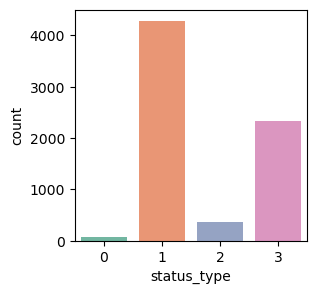

In [14]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(data=fb_Thai, x="status_type", palette="Set2");

In [240]:
X_colum = fb_Thai.drop('status_type', axis=1).columns
Y_colum = fb_Thai[['status_type']]

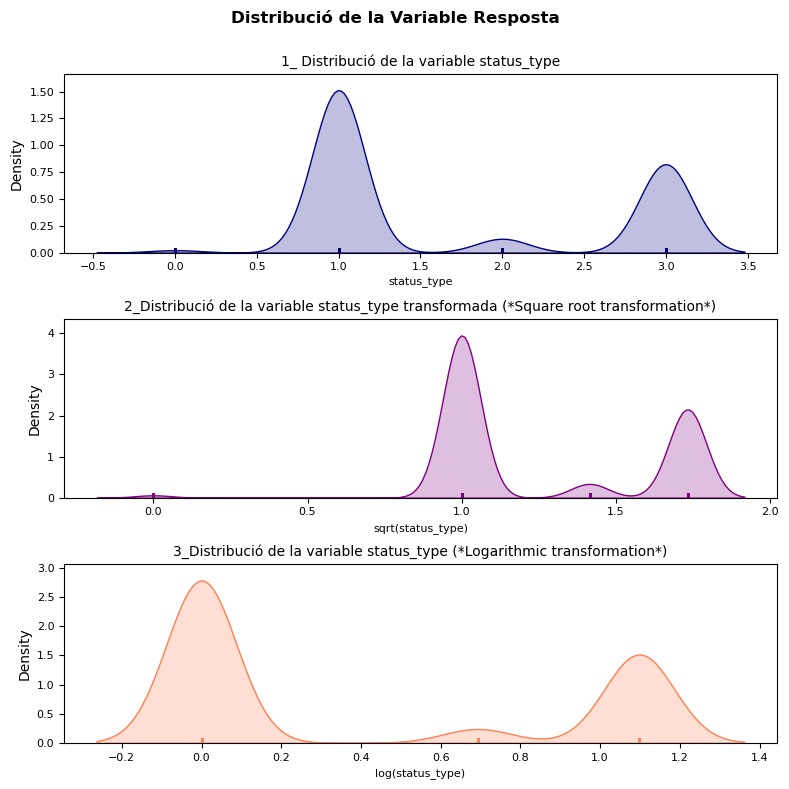

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
sns.distplot(
    Y_colum,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)

axes[0].set_title("1_ Distribució de la variable status_type", fontsize = 10)
axes[0].set_xlabel('status_type', fontsize=8) 
axes[0].tick_params(labelsize = 8)

sns.distplot(
    np.sqrt(Y_colum),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)

axes[1].set_title("2_Distribució de la variable status_type transformada (*Square root transformation*)", fontsize = 10)
axes[1].set_xlabel('sqrt(status_type)', fontsize=8) 
axes[1].tick_params(labelsize = 8)

sns.distplot(
    np.log(Y_colum),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("3_Distribució de la variable status_type (*Logarithmic transformation*)", fontsize = 10)
axes[2].set_xlabel('log(status_type)', fontsize=8) 
axes[2].tick_params(labelsize = 8)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de la Variable Resposta', fontsize = 12, fontweight = "bold");

In [58]:
aux =fb_Thai[fb_Thai["status_type"] == 0]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total outliers: Links')
print(f'_____________________\n\n{outliers_abs}')

Total outliers: Links
_____________________

day_week          0
hour              0
month             0
num_angrys        0
num_comments      7
num_hahas         2
num_likes        14
num_loves        14
num_reactions    14
num_sads          0
num_shares        6
num_wows          6
status_id         0
status_type       0
year              0
dtype: int64


In [19]:
aux =fb_Thai[fb_Thai["status_type"] == 1]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total outliers: Photo')
print(f'_____________________\n\n{outliers_abs}')

Total outliers: Photo
_____________________

day_week           0
hour             681
month              0
num_angrys        38
num_comments     450
num_hahas        212
num_likes        540
num_loves        677
num_reactions    540
num_sads         122
num_shares       527
num_wows         836
status_id          0
status_type        0
year               0
dtype: int64


In [20]:
aux =fb_Thai[fb_Thai["status_type"] == 2]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total outliers: Status')
print(f'______________________\n\n{outliers_abs}')

Total outliers: Status
______________________

day_week          0
hour              0
month             0
num_angrys        6
num_comments     55
num_hahas        22
num_likes        31
num_loves        67
num_reactions    31
num_sads         37
num_shares       56
num_wows         78
status_id         0
status_type       0
year              0
dtype: int64


In [21]:
aux =fb_Thai[fb_Thai["status_type"] == 3]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total outliers: Video')
print(f'______________________\n\n{outliers_abs}')

Total outliers: Video
______________________

day_week           0
hour             264
month              0
num_angrys       379
num_comments     236
num_hahas        166
num_likes        251
num_loves        160
num_reactions    224
num_sads         448
num_shares       173
num_wows         299
status_id          0
status_type        0
year             343
dtype: int64


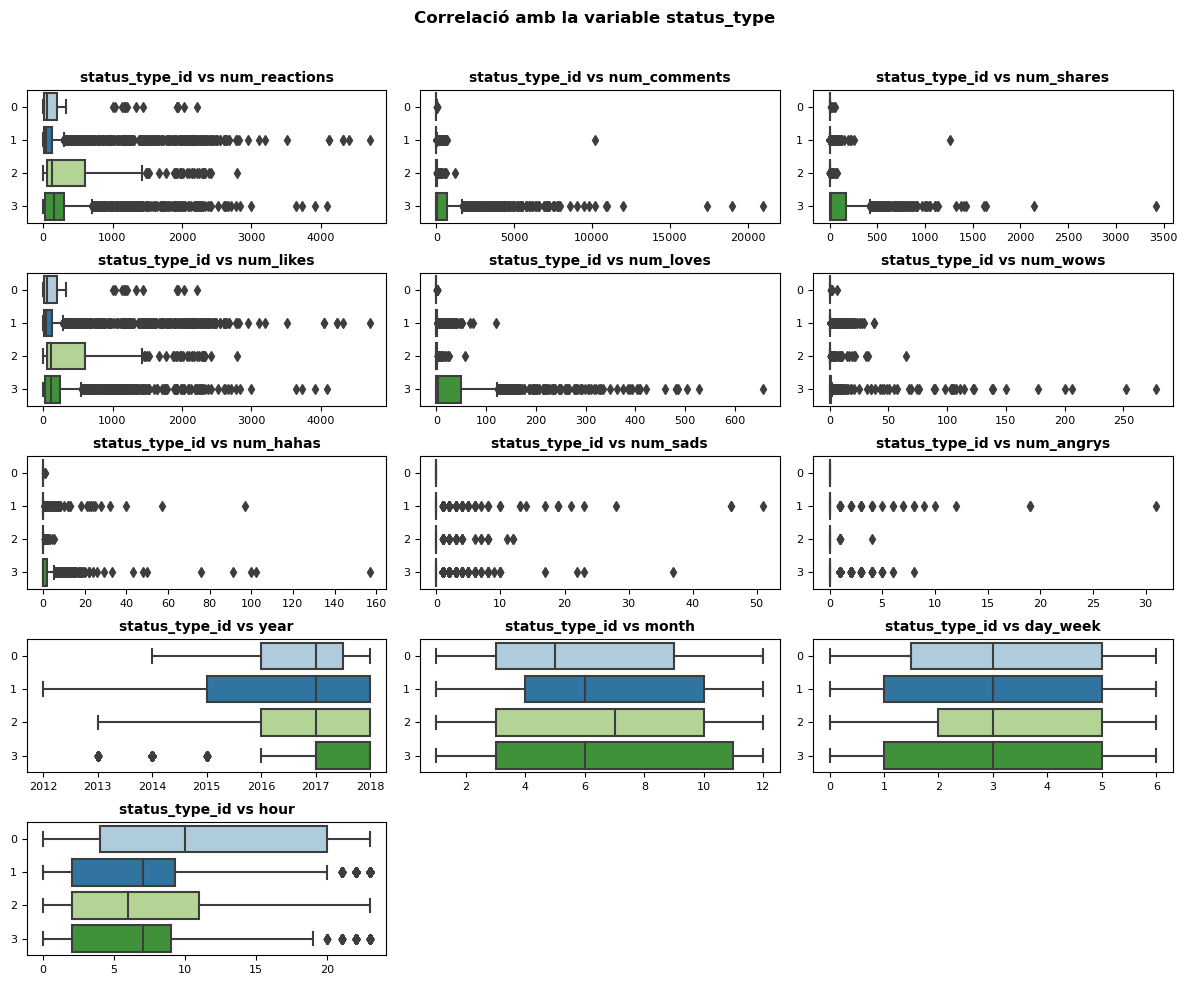

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))
axes = axes.flat

fb_T = fb_Thai.drop(['status_id'], axis=1)
X_col = fb_T.drop(['status_type'], axis=1).columns


for i,colum in enumerate(X_col):
    sns.boxplot(
        data    = fb_T,
        x       = fb_T[colum],
        y       = fb_T['status_type'],
        orient  = 'h',
        #color   ='skyblue',
        palette ="Paired",
        ax      = axes[i]
    ) 

   
    axes[i].set_title(f"status_type_id vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter()) 
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("", fontsize=8)
    axes[i].set_ylabel("", fontsize=8)


for i in [13, 14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()    
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlació amb la variable status_type', fontsize = 12, fontweight = "bold");

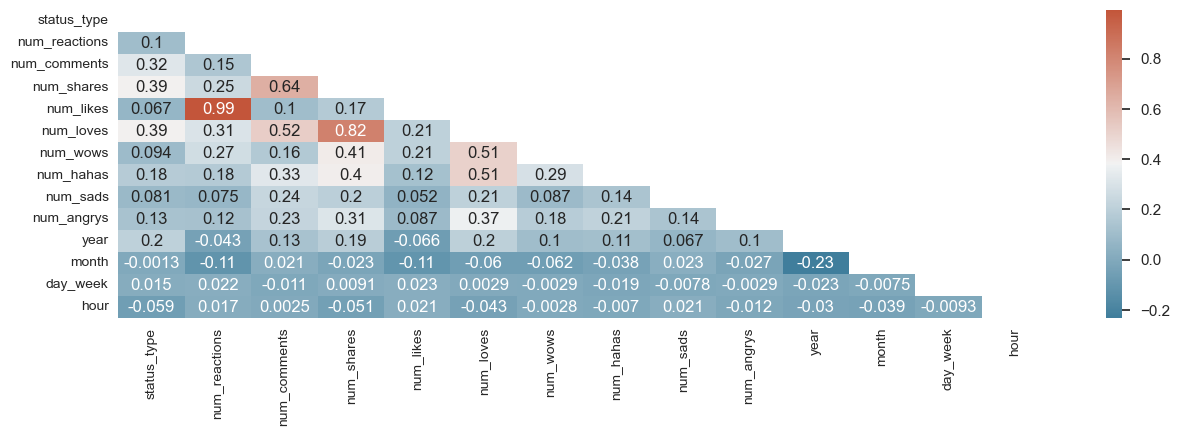

In [22]:
#Heatmap matriu de correlació

fig,ax = plt.subplots(figsize=(15,4))
corr = fb_Thai.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matx = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matx, cmap=cmap)
plt.show()

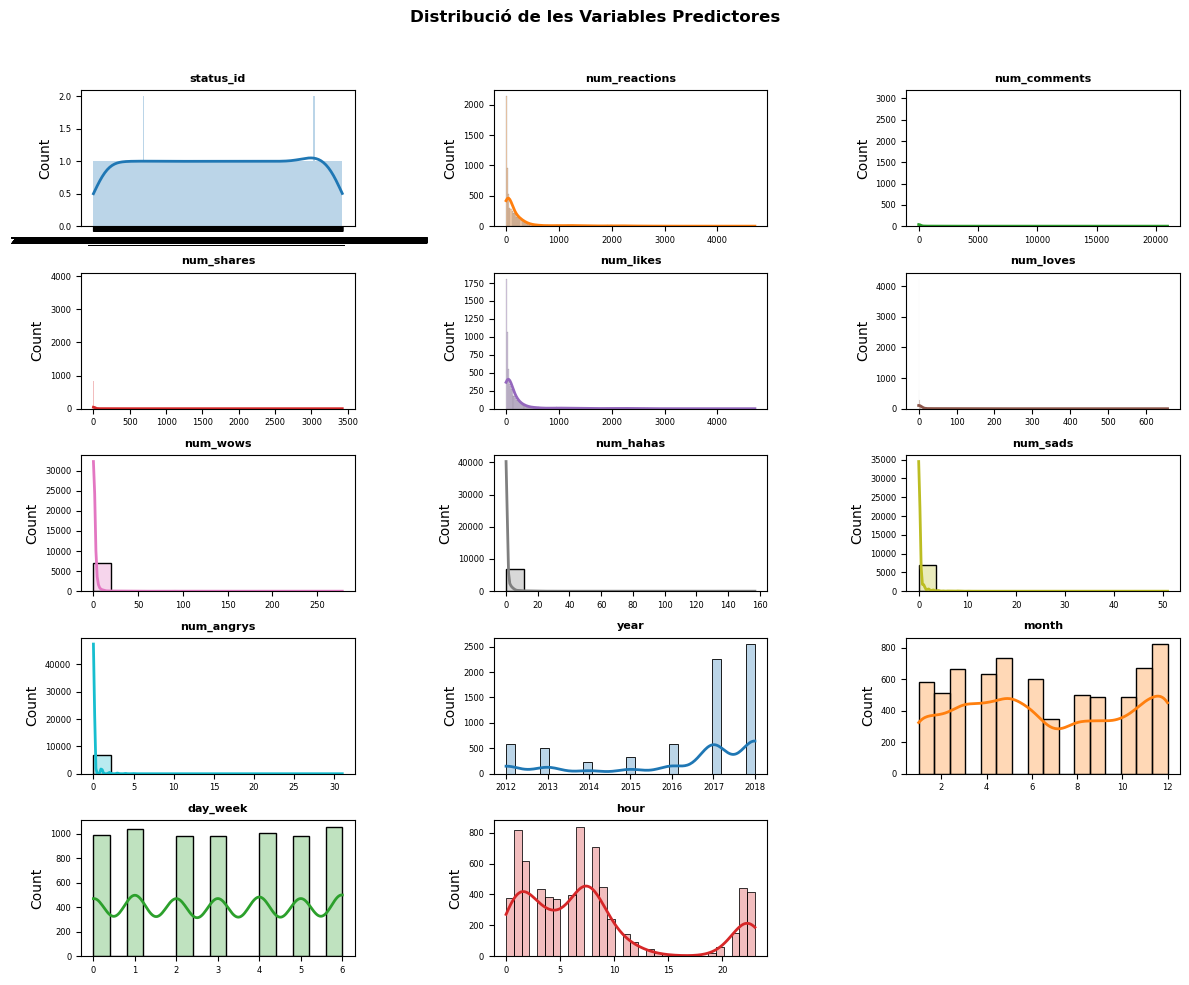

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))
axes = axes.flat

for i, colum in enumerate(X_colum):
    sns.histplot(
        data    = fb_Thai,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
# Se eliminem els axes buits
for i in [14]:
    fig.delaxes(axes[i])
     
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les Variables Predictores', fontsize = 12, fontweight = "bold");


In [241]:
fb = fb_Thai.copy()
fb.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'year', 'month', 'day_week', 'hour'],
      dtype='object')

In [242]:
fb.drop(['year', 'month', 'day_week', 'hour'],  axis=1, inplace=True)

In [243]:
fb.shape

(7050, 11)

### Data Scaled 

El mètode PCA és sensible a outliers. 

En el procès de PCA identifica les observacions amb més variança (p.e. outliers), pertant, abans de calcular les components, escalem les dades per tal que minimitzar els gaps entre observacions i entre variables.

In [29]:
#help
RobustScaler?

In [244]:
sc_features = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 
               'num_sads', 'num_angrys']

scaler = RobustScaler()
fb[sc_features] = scaler.fit_transform(fb[sc_features])

In [245]:
fb[sc_features]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


In [40]:
fb.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,7050.0,1.704965,0.942399,0.000000,1.000000,1.0,3.000000,3.000000
num_reactions,7050.0,0.844639,2.290224,-0.294554,-0.210396,0.0,0.789604,23.022277
num_comments,7050.0,9.580697,38.679862,-0.173913,-0.173913,0.0,0.826087,912.434783
num_shares,7050.0,10.005638,32.899991,0.000000,0.000000,0.0,1.000000,856.000000
num_likes,7050.0,0.936174,2.679418,-0.345753,-0.244411,0.0,0.755589,27.731744
num_loves,7050.0,4.242884,13.324310,0.000000,0.000000,0.0,1.000000,219.000000
num_wows,7050.0,1.289362,8.719650,0.000000,0.000000,0.0,0.000000,278.000000
num_hahas,7050.0,0.696454,3.957183,0.000000,0.000000,0.0,0.000000,157.000000
num_sads,7050.0,0.243688,1.597156,0.000000,0.000000,0.0,0.000000,51.000000
num_angrys,7050.0,0.113191,0.726812,0.000000,0.000000,0.0,0.000000,31.000000


### PCA

In [59]:
#help
PCA?

La detecció d'anomalies (*outliers) amb Anàlisis de Components Principals (*PCA) és una estratègia no supervisada per a identificar anomalies quan les dades no estan etiquetats, és a dir, no es coneix la classificació real (anomalia - no anomalia) de les observacions.

PCA és una tècnica de reducció de la dimensionalitat lineal, perdent la menor quantitat d'informació (variància) possible: quan comptem amb un gran nombre de variables quantitatives possiblement correlacionades, PCA permet reduir-les a un nombre menor de variables transformades (components principals) que expliquin gran part de la variabilitat en les dades. Cada dimensió o component principal generada per PCA serà una combinació lineal de les variables originals, i seran a més independents o no correlacionades entre si.

In [246]:
X = fb[sc_features]

In [247]:
pcaX = PCA(n_components=4)
pcaX.fit(X)

PCA(n_components=4)

In [66]:
print("Variança explicada amb 4 components: %.3f" % np.sum(pcaX.explained_variance_ratio_))

Variança explicada amb 4 components: 0.991


In [195]:
print(pcaX.explained_variance_ratio_.cumsum().round(3))

[0.78  0.952 0.977 0.991]


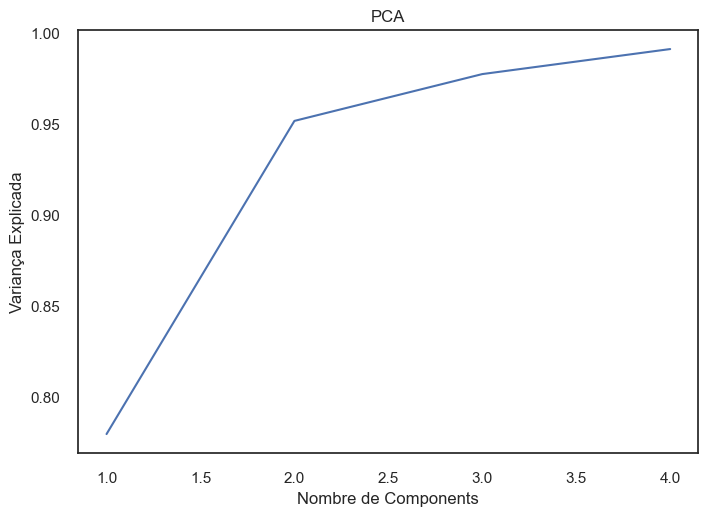

In [68]:
#Grafiquen per obtindre el detall dels components necessaris per explicar més del 0.95 de variança explicada

varianza_explicada = []

for n in range(1, 5):
    pca = PCA(n_components=n)
    pca.fit(X)
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

plt.plot(range(1,5), varianza_explicada)
plt.xlabel("Nombre de Components")
plt.ylabel("Variança Explicada")
plt.title("PCA")
plt.show();

Porcentatje de variança explicada acumulada
--------------------------------------------
[0.77977899 0.95167371 0.97737449 0.99110859]


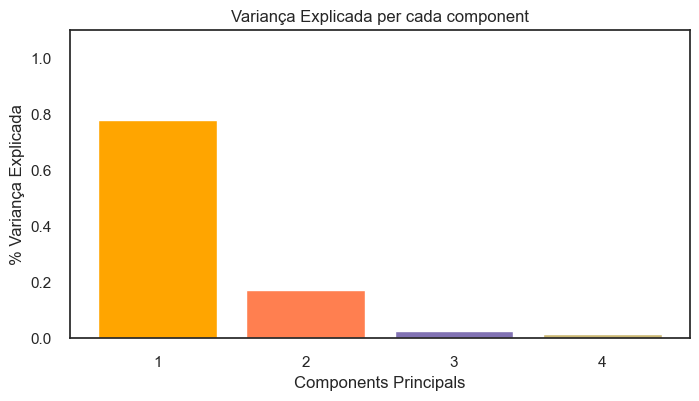

In [191]:
print('Porcentatje de variança explicada acumulada')
print('--------------------------------------------')
variance_acum = pcaX.explained_variance_ratio_.cumsum()
print(variance_acum)

p_compo = range(1, pcaX.n_components_+1)

plt.figure(figsize=(8,4))

plt.bar(p_compo, pcaX.explained_variance_ratio_, color=('orange','coral','m','y','k'))

plt.xlabel("Components Principals")
plt.ylabel("% Variança Explicada")
plt.title("Variança Explicada per cada component")
plt.xticks(p_compo)
plt.ylim(0, 1.1);

In [248]:
aux = pcaX.components_

num_compo = pcaX.n_features_
pca_list = ["PC_"+str(i) for i in list(range(1, num_compo+1))]
pca_df = pd.DataFrame.from_dict(dict(zip(pca_list, aux)))
pca_df['Variable'] = X.columns.values
pca_df = pca_df.set_index('Variable')
pca_df

,PC_1,PC_2,PC_3,PC_4
Variable,,,,
status_type,0.003896,0.002359,-0.000412,-0.010959
num_reactions,0.010807,0.016320,0.059467,-0.001866
num_comments,0.759992,-0.647258,0.053523,0.019234
num_shares,0.611598,0.695012,-0.334427,0.173758
num_likes,0.008655,0.013703,0.056426,0.008095
num_loves,0.208528,0.272678,0.548741,-0.734800
num_wows,0.058385,0.149853,0.748462,0.639532
num_hahas,0.034210,0.026880,0.130532,-0.141146
num_sads,0.008320,-0.001499,0.010432,-0.013515


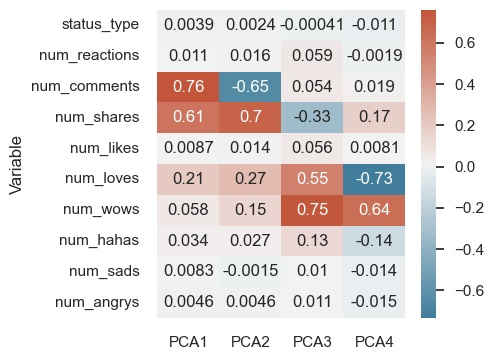

In [70]:
#Grafiquem la relació entre les variables

fig,ax = plt.subplots(figsize=(4,4))

sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(pca_df, annot=True, cmap=cmap)
plt.show()

In [249]:
pca3 = PCA(n_components = 3).fit_transform(X)

In [250]:
PCA3_components = pd.DataFrame(data = pca3 , columns = ["PC_1", "PC_2", "PC_3"])
PCA3_components

,PC_1,PC_2,PC_3
0,49.100728,37.985931,-1.902271
1,-14.528279,-2.021949,-0.609212
2,3.548261,3.339022,-0.064997
3,-14.532378,-2.028285,-0.633811
4,-13.896540,-1.194413,1.073721
...,...,...,...
7045,-14.534690,-2.031860,-0.647688
7046,-14.438746,-1.926111,-0.380960
7047,-14.474375,-1.955185,-0.519987
7048,-10.607933,1.677201,-1.928697


In [251]:
pca2 = PCA(n_components = 2).fit_transform(X)

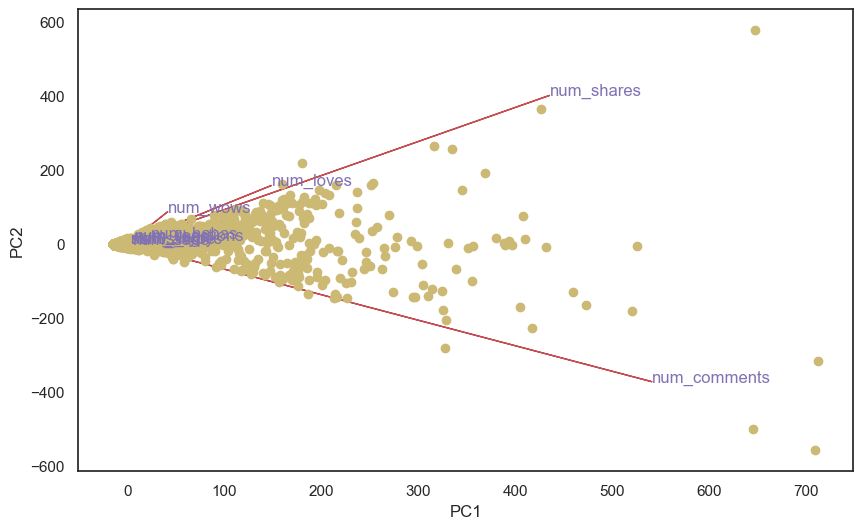

In [92]:
Xvector = aux[0] 
Yvector = aux[1]

Xpc = pca2[:,0]
Ypc = pca2[:,1]
    
plt.figure(figsize=(10,6))

for i in range(len(Xvector)):
    
    plt.arrow(0, 0, Xvector[i]*max(Xpc), Yvector[i]*max(Ypc),
        color='r', width=0.0005, head_width=0.0025)
    plt.text(Xvector[i]*max(Xpc), Yvector[i]*max(Ypc),
        list(X.columns.values)[i], color='m')

for i in range(len(Xpc)):
    plt.plot(Xpc[i], Ypc[i], 'yo')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.show();

In [252]:
PCA_components = pd.DataFrame(data = pca2 , columns = ["PC_1", "PC_2"])
PCA_components

,PC_1,PC_2
0,49.100728,37.985931
1,-14.528279,-2.021949
2,3.548261,3.339022
3,-14.532378,-2.028285
4,-13.896540,-1.194413
...,...,...
7045,-14.534690,-2.031860
7046,-14.438746,-1.926111
7047,-14.474375,-1.955185
7048,-10.607933,1.677201


Segons el mètode PCA, el nombre de components òptim per obtenir una variança explicada superior a 0.95, seria de 2 o 3 components. Si apliquem un PC_2, és a dir, 2 components, s'explica el  0.951 de la vaiança del model mentres que si agreguem un tercer component PC_3 la variaça explicada serà de 0.977. 

In [ ]:
### Clustering


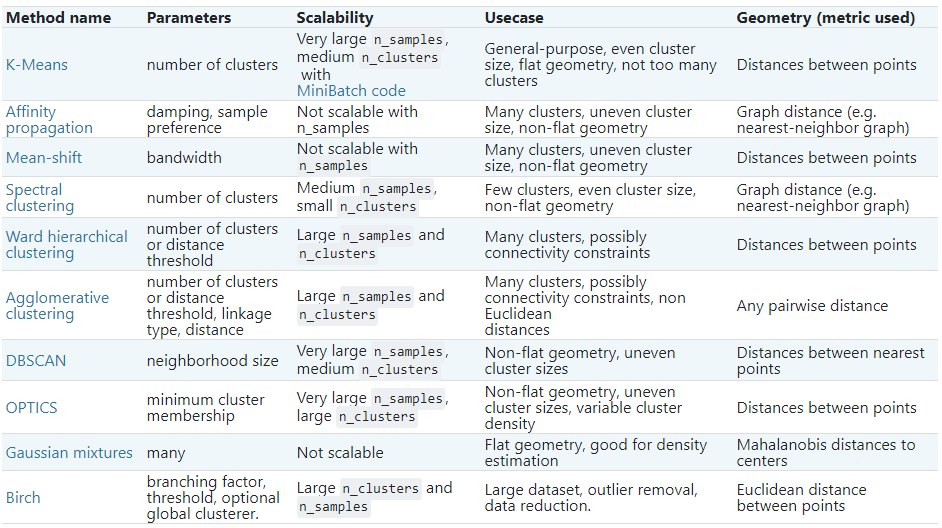

### PCA vs K-MEANS

S'aplica el mètode **PCA** (Anàlisi de Components Principals) abans d'un algorisme d'agrupament, com a **k-means**, ja que millora els resultats de l'agrupació en la reducció de soroll.
El objectiu i els resultats dels dos mètodes són diferents, **PCA** ajuda a reduir la quantitat de variables mantenint la variança, mentre que l'agrupament agrega informació a nivell de les observacions, en resumir diversos punts per les seves mitjanes.


**PCA** s'utilitza per a la reducció de dimensionalitat/selecció de característiques/aprenentatge de representació, per exemple, quan l'espai de característiques conté massa característiques irrellevants o redundants. L'objectiu és trobar la dimensionalitat intrínseca de les dades.
*PCA o altres tècniques de reducció de dimensionalitat s'utilitzen abans que els mètodes supervisats o no supervisats en l'aprenentatge automàtic.
Permet *condensar* la informació aportada per múltiples variables en menys components.


**K-means** és un algoritme d'agrupació que retorna la agrupació natural de punts de dades, en funció de la seva similitut. 
Aquí teniu un ["cas especial de Models Gaussians"](https://stats.stackexchange.com/questions/69424/if-k-means-clustering-is-a-form-of-gaussian-mixture-modeling-can-it-be-used-whe)

És a dir, descriu cada punt/observació en relació amb el seu grup, i necessita la mateixa quantitat d'informació, també les dimensions, així doncs, agrega informació i divideix les dades en grups naturals.


Per més detall, podeu consultar el següent enllaç: ["La relació entre PCA i l'agrupament"](https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca)
    

## Exercici 1

Classifica els diferents registres utilitzant l'algorisme de K-means.

### Requerimientos para aplicar la tècnica de clustering K-MEANS 

Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K (elbow, shilouette), pero todas ellas son orientativas.

Dificultad para detectar clusters alargados o con formas irregulares.

Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema, se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM).

In [253]:
#Ejecutem el mètode Kmeans amb 3 clusters i ho ajustem als 2 principals components

kmeans_pca = KMeans(init = "k-means++", n_clusters = 3, n_init = 10, random_state=42).fit(PCA_components)

In [254]:
#Verifiquem

labels_pca = kmeans_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'PCA_clusters':labels_pca})], axis=1)
clusters_pca

,PC_1,PC_2,PCA_clusters
0,49.100728,37.985931,1
1,-14.528279,-2.021949,0
2,3.548261,3.339022,0
3,-14.532378,-2.028285,0
4,-13.896540,-1.194413,0
...,...,...,...
7045,-14.534690,-2.031860,0
7046,-14.438746,-1.926111,0
7047,-14.474375,-1.955185,0
7048,-10.607933,1.677201,0


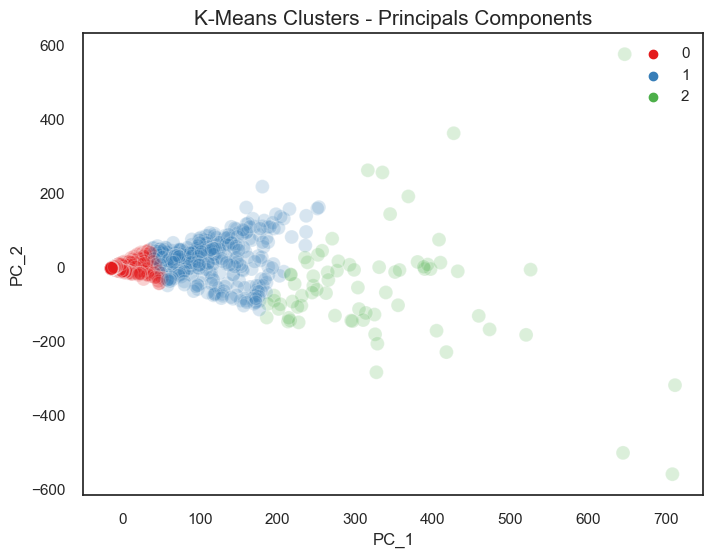

In [160]:
#Grafiquem els PCA 2

plt.figure(figsize=(8,6))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title("K-Means Clusters - Principals Components", fontsize=14)

plt.legend()
plt.show()

In [256]:
#Concatenem les dades originals amb els components i clusters

df_pca_kmeans = pd.concat([fb_Thai.reset_index(drop=True), clusters_pca], axis=1)

df_pca_kmeans.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6,49.100728,37.985931,1
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22,-14.528279,-2.021949,0
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6,3.548261,3.339022,0
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,2018,4,5,2,-14.532378,-2.028285,0
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,2018,4,2,3,-13.896540,-1.194413,0


In [257]:
#Agreguem els labels dels clusters

df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters,Kmeans PCA
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6,49.100728,37.985931,1,1
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22,-14.528279,-2.021949,0,0
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6,3.548261,3.339022,0,0
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,2018,4,5,2,-14.532378,-2.028285,0,0
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,2018,4,2,3,-13.896540,-1.194413,0,0


In [258]:
cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
cluster_0.head(3)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters,Kmeans PCA
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22,-14.528279,-2.021949,0,0
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6,3.548261,3.339022,0,0
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,2018,4,5,2,-14.532378,-2.028285,0,0


In [259]:
cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,6495.0,1.595227,0.899548,0.000000,1.000000,1.000000,3.000000,3.000000
num_reactions,6495.0,205.906851,450.891158,0.000000,16.000000,48.000000,176.000000,4710.000000
num_comments,6495.0,50.590146,153.156560,0.000000,0.000000,3.000000,14.000000,1686.000000
num_shares,6495.0,10.632640,34.446911,0.000000,0.000000,0.000000,2.000000,295.000000
num_likes,6495.0,200.258661,449.199665,0.000000,16.000000,46.000000,158.000000,4710.000000
num_loves,6495.0,4.515627,13.678297,0.000000,0.000000,0.000000,2.000000,234.000000
num_wows,6495.0,0.629407,2.304539,0.000000,0.000000,0.000000,0.000000,65.000000
num_hahas,6495.0,0.291147,2.320170,0.000000,0.000000,0.000000,0.000000,102.000000
num_sads,6495.0,0.153041,1.457322,0.000000,0.000000,0.000000,0.000000,51.000000
num_angrys,6495.0,0.056043,0.645469,0.000000,0.000000,0.000000,0.000000,31.000000


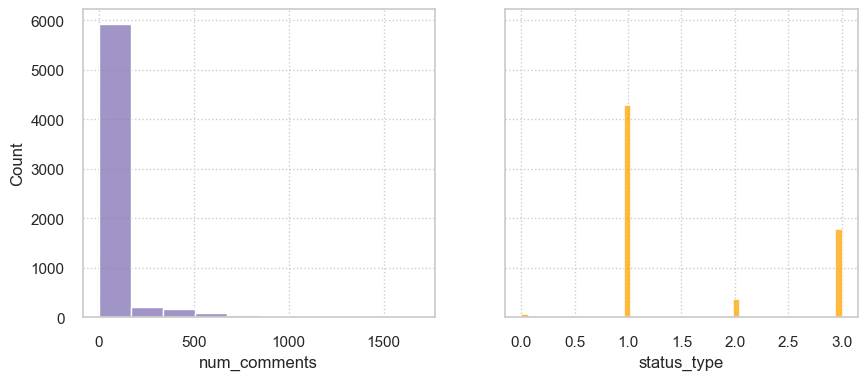

In [268]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=cluster_0, x="num_comments",color="m", ax=ax1 , bins=10)
sns.histplot(data=cluster_0, x="status_type",color="orange", ax=ax2, bins=50);

In [260]:
cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
cluster_1.head(3)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters,Kmeans PCA
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6,49.100728,37.985931,1,1
99,246675545449582_1474958169287974,3,1493,1979,753,1333,139,9,3,8,1,2017,11,5,1,176.495201,87.385362,1,1
166,246675545449582_1404391233011335,1,4410,633,257,4315,73,17,5,0,0,2017,9,6,5,52.363759,34.820418,1,1


In [261]:
cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,483.0,2.991718,0.128564,1.000000,3.000000,3.000000,3.000000,3.000000
num_reactions,483.0,486.204969,508.629076,64.000000,214.000000,280.000000,410.000000,4410.000000
num_comments,483.0,1593.374741,1024.823933,18.000000,908.500000,1293.000000,1939.000000,5000.000000
num_shares,483.0,337.144928,177.459655,34.000000,220.500000,284.000000,429.000000,1260.000000
num_likes,483.0,367.130435,425.152574,54.000000,142.000000,191.000000,302.500000,4315.000000
num_loves,483.0,103.672878,85.911422,5.000000,51.000000,81.000000,121.500000,657.000000
num_wows,483.0,8.728778,28.876740,0.000000,1.000000,1.000000,4.000000,278.000000
num_hahas,483.0,4.917184,10.970792,0.000000,1.000000,3.000000,5.000000,157.000000
num_sads,483.0,1.041408,2.269760,0.000000,0.000000,0.000000,1.000000,37.000000
num_angrys,483.0,0.714286,1.103156,0.000000,0.000000,0.000000,1.000000,8.000000


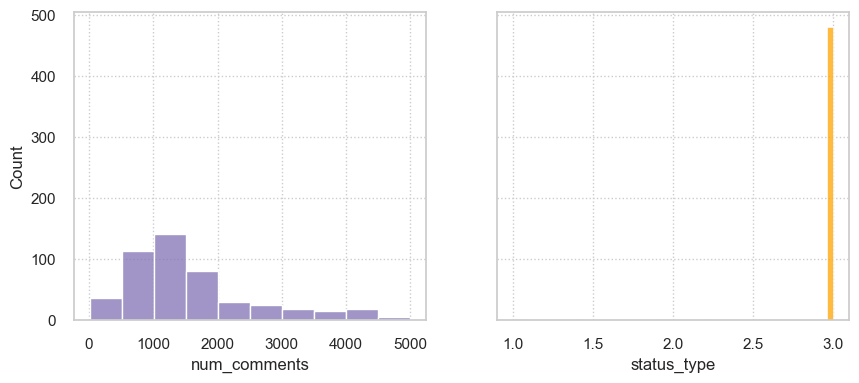

In [269]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=cluster_1, x="num_comments",color="m", ax=ax1 , bins=10)
sns.histplot(data=cluster_1, x="status_type",color="orange", ax=ax2, bins=50);

In [262]:
cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
cluster_2.head(3)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters,Kmeans PCA
413,246675545449582_1170184399765354,3,446,6148,120,352,80,7,5,0,2,2017,1,5,22,213.148633,-145.679582,2,2
475,246675545449582_1140401796076948,3,358,5498,94,294,57,1,5,1,0,2016,12,3,2,185.737647,-134.917333,2,2
480,246675545449582_1134207113363083,3,452,19013,161,353,92,2,3,2,0,2016,12,4,21,644.999027,-500.321907,2,2


In [263]:
cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,72.0,2.972222,0.235702,1.000000,3.000000,3.000000,3.000000,3.000000
num_reactions,72.0,696.166667,420.888831,228.000000,416.000000,567.000000,841.500000,2399.000000
num_comments,72.0,6715.652778,3325.494322,1778.000000,4963.000000,5979.000000,7528.750000,20990.000000
num_shares,72.0,698.041667,527.660167,25.000000,337.750000,597.500000,887.500000,3424.000000
num_likes,72.0,528.472222,312.348982,138.000000,335.250000,456.000000,629.750000,1737.000000
num_loves,72.0,143.527778,107.851485,5.000000,57.000000,116.500000,198.500000,529.000000
num_wows,72.0,10.916667,29.860120,0.000000,2.750000,4.000000,7.000000,206.000000
num_hahas,72.0,8.944444,6.326535,0.000000,5.000000,8.000000,12.250000,43.000000
num_sads,72.0,3.069444,3.294581,0.000000,1.000000,2.000000,3.250000,23.000000
num_angrys,72.0,1.236111,1.429006,0.000000,0.000000,1.000000,2.000000,5.000000


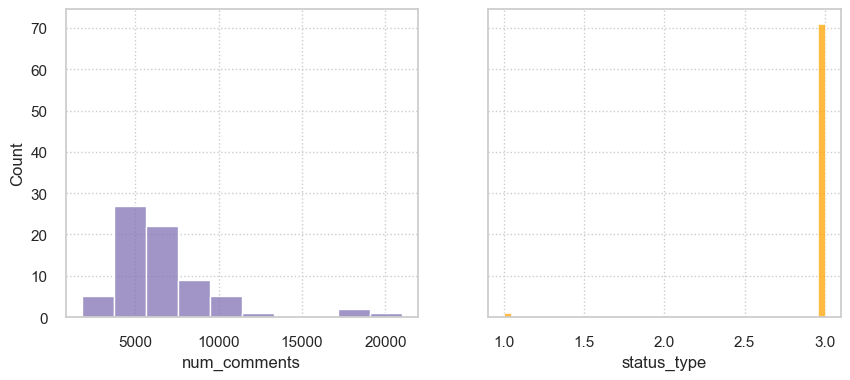

In [270]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=cluster_2, x="num_comments",color="m", ax=ax1 , bins=10)
sns.histplot(data=cluster_2, x="status_type",color="orange", ax=ax2, bins=50);

Segons les dades analitzades de cada cluster, verifiquem que l'atribut amb major diferencia de la mitja és *num_comments*. Li següeix l'atribut *num_shares*, *num_likes*.

Interpretem que amb 3 clusters, quan més videos publiquem, major serà el nombre de comentaris, concretament 6715. A més, 4963 observacions (66%) es concentrará en el 1erQ.

### Partitional Clustering: K-MEANS

In [264]:
Kms_df = fb[sc_features]

In [215]:
Kms = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
Kms.fit(Kms_df)

KMeans(init='random', n_clusters=4, random_state=42)

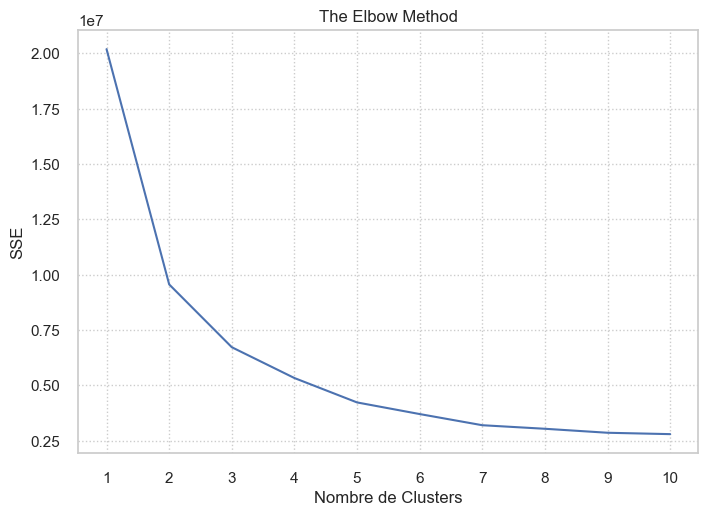

In [216]:
#Iniciem ela parametres de kmeans

kmeans_kwargs = {
                 "init": "random",
                 "n_init": 10,
                 "random_state": 1
                 }

#ConstruÏm la llista pels valors de SSE values per cada k

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Kms_df)
    sse.append(kmeans.inertia_)

#Grafiquem

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de Clusters")
plt.ylabel("SSE")
plt.title("The Elbow Method")
plt.show();

In [46]:
#help
KneeLocator?

In [217]:
#Apliquem el mètode KneeLocator()

kneelc = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kneelc.elbow

3

In [218]:
Kms2 = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
Kms2.fit(Kms_df)

KMeans(init='random', n_clusters=3, random_state=1)

Variació del atribut **Inertia_** del algoritme KMeans en funció del paràmtre **n_clusters** (3)

In [219]:
print('Inertia:  ', Kms2.inertia_)

Inertia:   6723867.549970567


In [220]:
print('Centroides:\n\n', Kms2.cluster_centers_)

Centroides:

 [[9.90909091e-01 2.86296130e+00 2.50450988e+02 1.49340909e+02
  2.57032922e+00 4.15939394e+01 1.14272727e+01 8.61818182e+00
  2.71818182e+00 1.10000000e+00]
 [9.96282528e-01 1.85896610e+00 5.39118313e+01 7.67676580e+01
  1.59517781e+00 3.22137546e+01 7.12825279e+00 4.17657993e+00
  8.38289963e-01 6.35687732e-01]
 [2.87410184e-01 7.24720152e-01 1.71661030e+00 2.00113246e+00
  8.52715084e-01 1.25054670e+00 6.24492346e-01 2.67885036e-01
  1.51202749e-01 5.23273977e-02]]


In [221]:
print('Iteraccions:  ', Kms2.n_iter_)

Iteraccions:   17


In [222]:
Kms2.labels_[:10]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

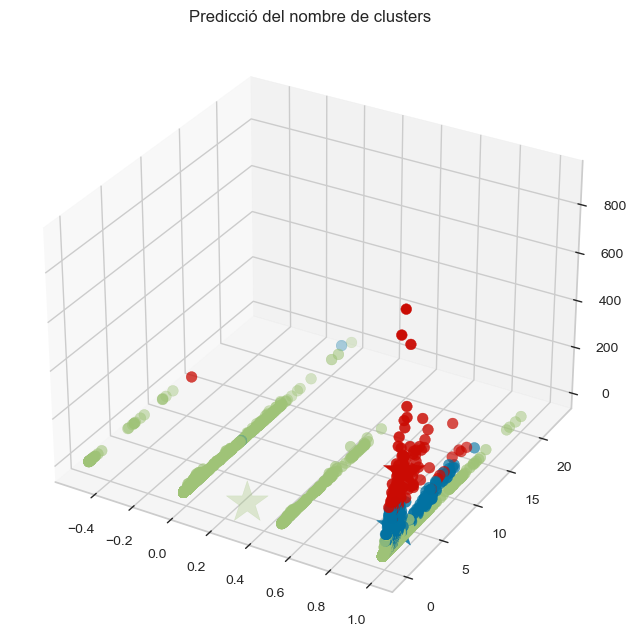

In [144]:
#Prediem els clústers

Xs = Kms_df.values
labels = Kms2.predict(Xs)

#Obtenim els centres dels cluster

C = Kms2.cluster_centers_
colores=['r','b','g']

centroid=[]
for row in labels:
    centroid.append(colores[row])

fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(Xs[:, 0], 
           Xs[:, 1], 
           Xs[:, 2], 
           c=centroid, s=60)

ax.scatter(C[:, 0], 
           C[:, 1], 
           C[:, 2], 
           marker='*', 
           c=colores, s=1000)

plt.title("Predicció del nombre de clusters");

In [223]:
label_Kms = pd.Series(Kms2.labels_)
label_Kms.unique()

array([1, 2, 0])

In [265]:
X_df = X.copy()
X_df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [266]:
X_df['Pred_K-means'] = Kms2.labels_
X_df.sample(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Pred_K-means
368,1.0,-0.042079,0.173913,1.50,-0.041729,0.000000,0.0,0.0,0.0,0.0,2
609,0.0,0.155941,0.391304,3.50,0.166915,0.666667,3.0,0.0,0.0,0.0,2
310,0.0,0.764851,-0.130435,0.00,0.894188,1.666667,1.0,0.0,0.0,0.0,2
1849,0.0,-0.071782,0.434783,0.00,-0.077496,0.000000,0.0,0.0,0.0,0.0,2
2904,0.0,3.121287,1.260870,5.25,3.648286,5.000000,5.0,0.0,0.0,0.0,2
5152,1.0,0.398515,16.304348,27.75,0.077496,22.333333,1.0,0.0,1.0,0.0,2
1632,0.0,0.012376,0.086957,0.00,0.023845,0.000000,0.0,0.0,0.0,0.0,2
4097,1.0,-0.289604,-0.173913,0.25,-0.339791,0.000000,0.0,0.0,0.0,0.0,2
2709,0.0,-0.215347,-0.043478,0.25,-0.250373,0.000000,0.0,0.0,0.0,0.0,2
4550,1.0,3.730198,23.391304,41.25,3.952310,27.666667,2.0,5.0,0.0,2.0,1


## Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

### Hierarchical Clustering

**Hierarchical clustering** és una alternativa als mètodes de *partitioning clustering* que no requereix que es pre-especifiqui el nombre de clústers. Els mètodes que engloba el *hierarchical *clustering es subdivideixen en dos tipus d'estratègia per a crear els grups:

* **Aglomerativo** (*Agglomerative Clustering* o *bottom-up*): l'agrupament s'inicia amb totes les observacions separades, cadascuna formant un clúster individual. Els clústers es van combinat a mesura que l'estructura creix fins a convergir en un o principal.

* **Divisible** (*Divisive Clustering* o *top-down*): és l'estratègia oposada l' *aglomerativo*. S'inicia amb totes les observacions contingudes en un mateix clúster i se succeeixen divisions fins que cada observació formant un clúster únic.

En tots dos casos, els resultats poden representar-se de forma molt intuïtiva en una estructura d'arbre anomenada dendrograma. Els resultats del **hierarchical clustering** poden representar-se com un arbre en el qual les branques representen la jerarquia amb la qual es van succeint les unions de clústers.

Per identificar el nombre de clústers s'inspecciona visualment el *dendograma* i es decideix a quina altura es talla per a generar els clústers. per exemple, mitjançant la distància euclidiana i linkage ward.

In [120]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as shc

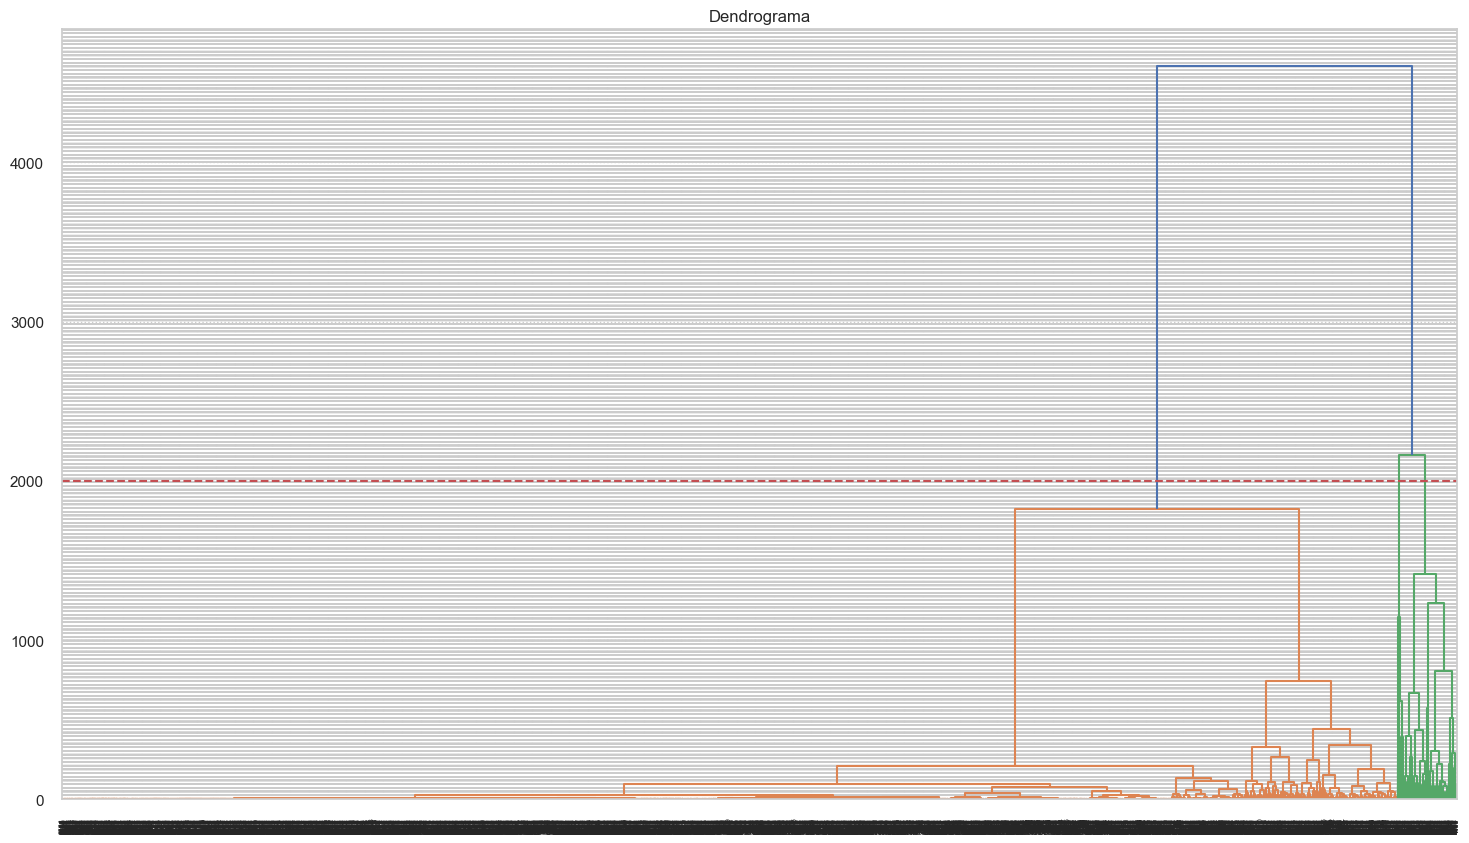

In [200]:
plt.figure(figsize=(18, 10))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5

plt.title("Dendrograma")  
dendrogram = shc.dendrogram(shc.linkage(PCA_components, method='ward'));
plt.axhline(y=2000, color='r', linestyle='--')
plt.show();

In [148]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit(PCA_components)

AgglomerativeClustering(n_clusters=3)

In [137]:
labels_hier = cluster.labels_
labels_hier[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [139]:
df_hier_pca = cluster.fit(PCA_components)

Hem definit 3 grups, l'output "0" representa el grup 1.

In [275]:
clusters_pca2 = pd.concat([df_pca_kmeans, pd.DataFrame({'PCA_clusters_hier':labels_hier})], axis=1)
clusters_pca2.head(3)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_week,hour,PC_1,PC_2,PCA_clusters,Kmeans PCA,PCA_clusters_hier
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6,49.100728,37.985931,1,1,0
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22,-14.528279,-2.021949,0,0,0
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6,3.548261,3.339022,0,0,0


In [272]:
kmeans_pca = KMeans(init = "k-means++", n_clusters = 3, n_init = 10, random_state=42).fit(PCA_components)

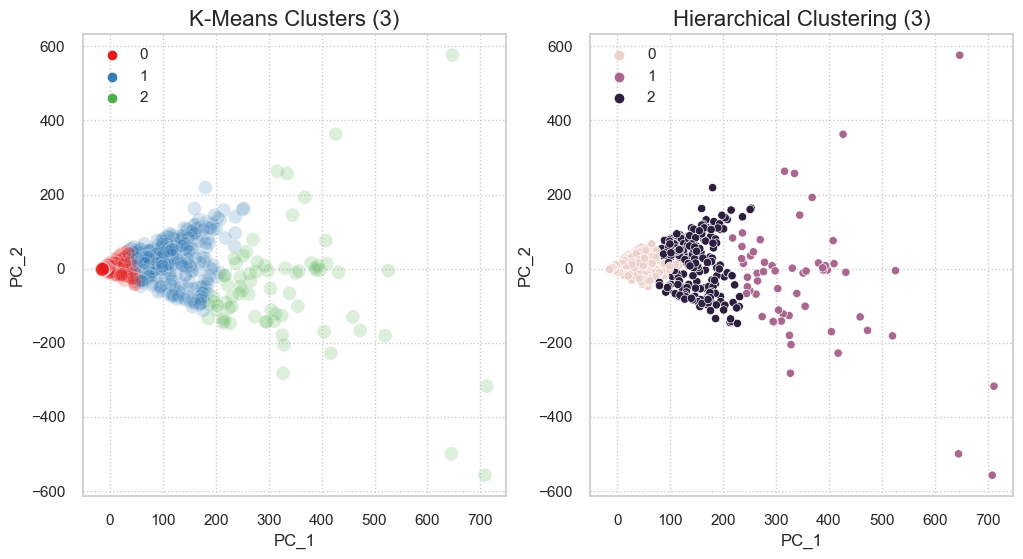

In [201]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title('K-Means Clusters (3)', fontsize=16)


plt.subplot(1,2,2)
sns.scatterplot(x="PC_1", y="PC_2",
                data=clusters_pca2,
                hue='pca_clusters_hier').set_title('Hierarchical Clustering (3)', fontsize=16);

plt.legend()
plt.show()

### Density-Based Clustering

In [ ]:
# PCA (n_components=2) and K-means with cluster = 3 

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [321]:
X_scaled = fb_Thai.copy()
X_scaled.to_numpy()
scale(X_scaled)

array([[ 0.23845248,  1.37428794,  0.64610394, ..., -0.71866065,
         1.48308742, -0.26566892],
       [ 0.23845248, -0.74810636, -0.17319166, ..., -0.71866065,
         0.98623481,  2.05774975],
       [ 0.23845248,  1.37428794, -0.00673846, ..., -0.71866065,
         0.98623481, -0.26566892],
       ...,
       [ 2.77385707, -0.74810636, -0.49312768, ...,  0.67531877,
        -0.50432302,  2.20296342],
       [ 2.77385707, -0.74810636,  0.26131603, ...,  0.67531877,
        -1.00117563, -1.13695092],
       [ 2.77385707, -0.74810636, -0.46070173, ...,  0.67531877,
         0.98623481,  0.31518575]])

In [322]:
X_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

X_dbscan.fit(X=X_scaled)

DBSCAN(eps=0.2)

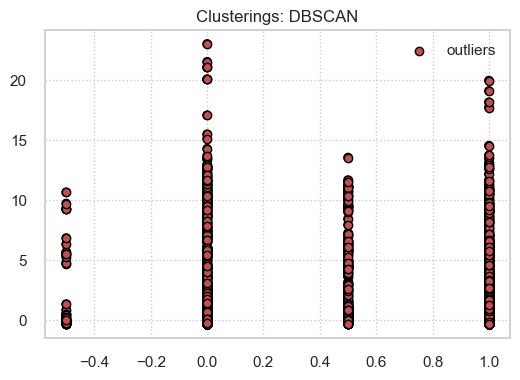

In [332]:
labels = X_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(
    x = X.iloc[:, 0],
    y = X.iloc[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

#Els outliers s'identifiquen amb el label -1

ax.scatter(
    x = X.iloc[labels == -1, 0],
    y = X.iloc[labels == -1, 1], 
    c = 'r',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings: DBSCAN');

El mètode DBSCAN ens indiquen 3 clusters.

## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

### Silhouette Visualizer

In [285]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
#help
SilhouetteVisualizer?

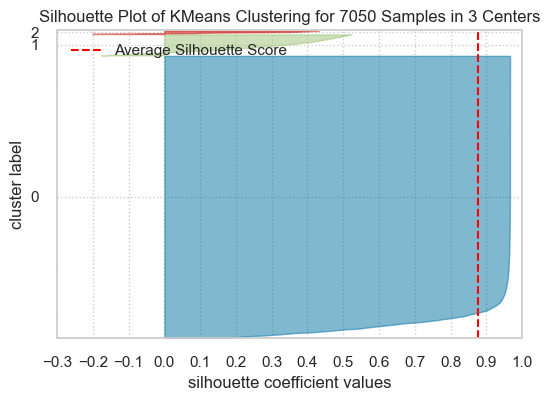

In [284]:
#k=3

fig,ax=plt.subplots(figsize=(6,4))

visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick')

visualizer.fit(PCA_components)       
visualizer.show();  

In [286]:
silhouette_score(PCA_components, kmeans_pca.labels_)

0.8765938601537852

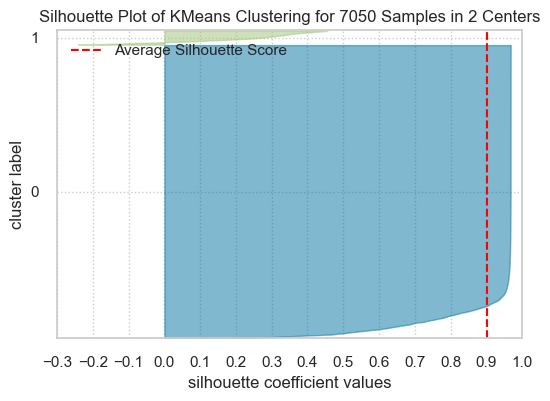

In [288]:
#k=2

fig,ax=plt.subplots(figsize=(6,4))

visualizer = SilhouetteVisualizer(KMeans(init = "k-means++", 
                                         n_clusters = 2, n_init = 12, 
                                         random_state=42).fit(PCA_components), colors='yellowbrick')

visualizer.fit(PCA_components)      
visualizer.show();      

In [290]:
silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 2, n_init = 12, random_state=42).fit(PCA_components)).labels_)

0.9015320557306394

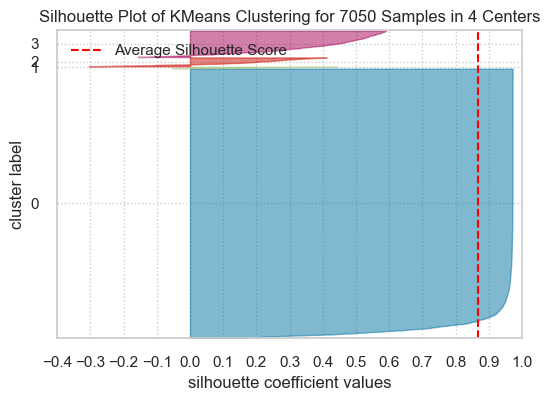

In [289]:
#k=4

fig,ax=plt.subplots(figsize=(6,4))

visualizer = SilhouetteVisualizer(KMeans(init = "k-means++", 
                                         n_clusters = 4, n_init = 12, 
                                         random_state=42).fit(PCA_components), colors='yellowbrick')

visualizer.fit(PCA_components)      
visualizer.show();   

In [291]:
silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)).labels_)

0.8673386783962637

**SilhouetteVisualizer**, mostra el coeficient de silueta per a cada mostra per grup, i avalua visualment la densitat i la separació entre grups. La puntuació es calcula per mitjà del coeficient de silueta per a cada mostra.

La puntuació es troba dins del rang [-1, 1]. La puntuació de 1 significa que els grups són molt densos i ben separats. La puntuació de 0 significa que els clústers es superposen, i inferior a 0 significa que les dades del conglomerats poden ser errònies/incorrectes.

El silhouette_score més proper a 1 és el que correspon al K=2 amb 0.901.